# Tree related models

####  In this tutorial, we demonstrate how we fit the tree related models, tree and random forest. 

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('./data')
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./lee.csv')
# defining quadratic and interaction terms
df['year.sq'] = df.year**2




# between metoerology variables

df['tavg.1tavg_below_5'] = df['tavg.1']*df.tavg_below_5 
df['prcp.0tavg_below_5'] = df['prcp.0']*df.tavg_below_5
df['tavg.0tmax.2'] = df['tavg.0']*df['tmax.2'] 
df['prcp.-2prcp.2'] = df['prcp.-2']*df['prcp.2']
df['prcp.-2prcp.0'] = df['prcp.-2']*df['prcp.0']
df['tavg.0prcp.2'] = df['tavg.0']*df['prcp.2']
df['Date_doy_tmaxDate_doy_tmin'] = df['Date_doy_tmax']*df['Date_doy_tmin']
df['tmin_movingtmin.1'] = df['tmin_moving']*df['tmin.1']
df['tavg_below_5prcp.2'] = df['tavg_below_5']*df['prcp.2']
df['tavg.0prcp.2'] = df['tavg.0']*df['prcp.2']
df['prcp.-1tmax.3'] = df['prcp.-1']*df['tmax.3']



# between met and geography

df['tavg_above_10lat'] = df['lat']*df['tavg_above_10']
df['prcp.1alt'] = df['prcp.1']*df['alt']
df['tmin.-1long.y'] = df['tmin.-1']*df['long.y']
df['alttavg_moving'] = df['alt']*df['tavg_moving']


# between geography

df['latlong.y'] = df['lat']*df['long.y']
df['long.ylong.x'] = df['long.y']*df['long.x']






# # selecting covariates to be used in the model



X_full = df[['lat', 'alt', 'long.y', 'long.x', 'year', 'year.sq',
       'Date_doy_tavg', 'Date_doy_tmax', 'Date_doy_tmin', 
        'tavg_below_5','tavg_above_10', 
       'tavg_moving', 'tmin_moving', 'tmax_moving', 
        'prcp.-2', 'prcp.-1', 'prcp.0', 'prcp.1', 'prcp.2', 
       'tavg.-2', 'tavg.-1', 'tavg.0', 'tavg.1', 'tavg.2', 
        'tmax.-2', 'tmax.-1', 'tmax.0', 'tmax.1', 'tmax.2',
       'tmin.-2', 'tmin.-1', 'tmin.0', 'tmin.1', 'tmin.2', 
       'slope', 'dg2_coef', 'intc', 
        'tavg.3', 'tmin.3', 'tmax.3', 
       'tavg.1tavg_below_5', 'tavg.0tmax.2', 'prcp.-2prcp.2', 'prcp.-2prcp.0',
       'tavg.0prcp.2', 'Date_doy_tmaxDate_doy_tmin', 'tmin_movingtmin.1',
       'tavg_below_5prcp.2', 'prcp.-1tmax.3', 'tavg_above_10lat', 'prcp.1alt',
       'tmin.-1long.y', 'alttavg_moving', 'latlong.y', 'long.ylong.x']]

y = df.bloom_doy

In [3]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
mse = make_scorer(mean_squared_error, greater_is_better = False )
cv = ShuffleSplit(n_splits=20, test_size=0.3)

### Grid Search CV for ccp_alpha hyper-parameter

We would like to search the best `ccp_alpha` parameter for the tree model.

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = {'ccp_alpha':np.arange(0.01, 1.99, 0.01)}

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import tree
regressor = DecisionTreeRegressor()
clf = GridSearchCV(regressor, parameters, cv = cv, scoring = mse)
clf.fit(X_full, y)

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.3, train_size=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
index = np.where(clf.cv_results_['rank_test_score']==1)[0][0]
alpha = np.arange(0.01, 1.99, 0.01)[index]
alpha

0.92

#### we will now have ccp_alpha at 0.92

In [8]:
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha = alpha),
                       n_estimators=100, bootstrap_features = True)
tree = DecisionTreeRegressor(ccp_alpha = alpha)
scoreBagging = cross_val_score(Bagging, X_full, y, cv= cv, scoring = mse)
scoreTree = cross_val_score(tree, X_full, y, cv = cv, scoring = mse)

In [9]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(ccp_alpha = alpha)
scoreForest = cross_val_score(Forest, X_full, y, cv = cv, scoring = mse)

### Mean of RMSE for Random Froest, Tree with bagging, and Tree

In [10]:
# mean squred error
np.sqrt(abs(scoreForest.mean())), np.sqrt(abs(scoreBagging.mean())),np.sqrt(abs(scoreTree.mean()))

(6.218766085140226, 6.1301893604802355, 7.473389530495939)

### Varinace of RMSE for Random Forest, Tree with bagging and Tree

In [11]:
# variance
np.sqrt(abs(scoreForest)).var(), np.sqrt(abs(scoreBagging)).var(), np.sqrt(abs(scoreTree)).var()

(0.28888109898696335, 0.16571378665374767, 0.3925702169888511)

### Mean decrease in impunity plot for five most 'important' features

In [12]:
Forest.fit(X_full, y)
feature_names = X_full.columns
importances = Forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

forest_importances = forest_importances[forest_importances>0.01].sort_values()

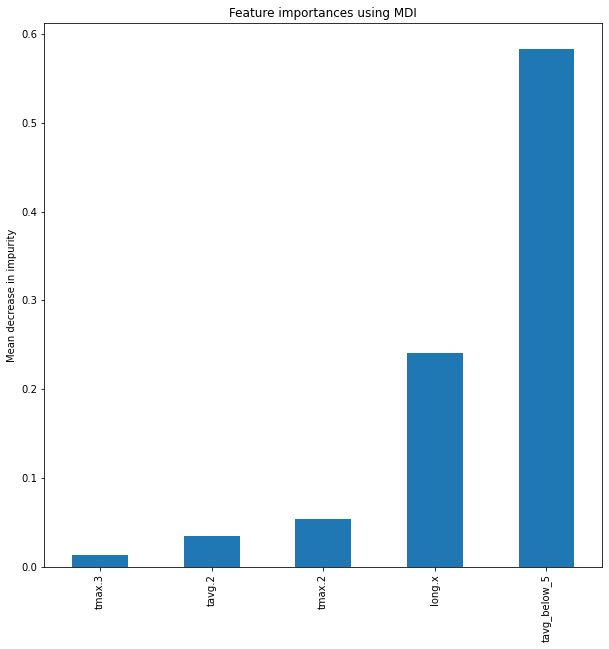

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

In [14]:
fig.savefig('feature_importance.png')